### Pima Indian Diabetes Dataset Classification

This notebook aims to build and evaluate a classification model for the Pima Indian Diabetes dataset using a Random Forest classifier. 

#### 1. Importing Required Libraries

In [62]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import numpy as np

#### Checking GPU

In [63]:
# Check TensorFlow version
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# Check if TensorFlow is using the GPU (if applicable)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available.")
else:
    print("GPU is not available.")


TensorFlow version: 2.9.0
GPU is available.


#### 2. Loading the Dataset

We will load the Pima Indian Diabetes dataset and display the first few rows to understand its structure.



In [64]:
# Load the dataset
# Change the path if needed
data = pd.read_csv('../dataset/diabetes.csv')

# Display the first few rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 3. Checking for Missing Values

We will check for any missing values in the dataset to ensure data integrity.


In [65]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### 4. Data Preprocessing

#### 4.1 Splitting Features and Target Variable
We will separate the features and the target variable.


In [66]:
# Data preprocessing
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']                # Target variable

#### 4.2 Splitting the Dataset
We will split the dataset into training and testing sets.


In [67]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5. Training the Model

We will train a Random Forest classifier on the training data.


In [68]:
# Training the model using Decision Tree
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

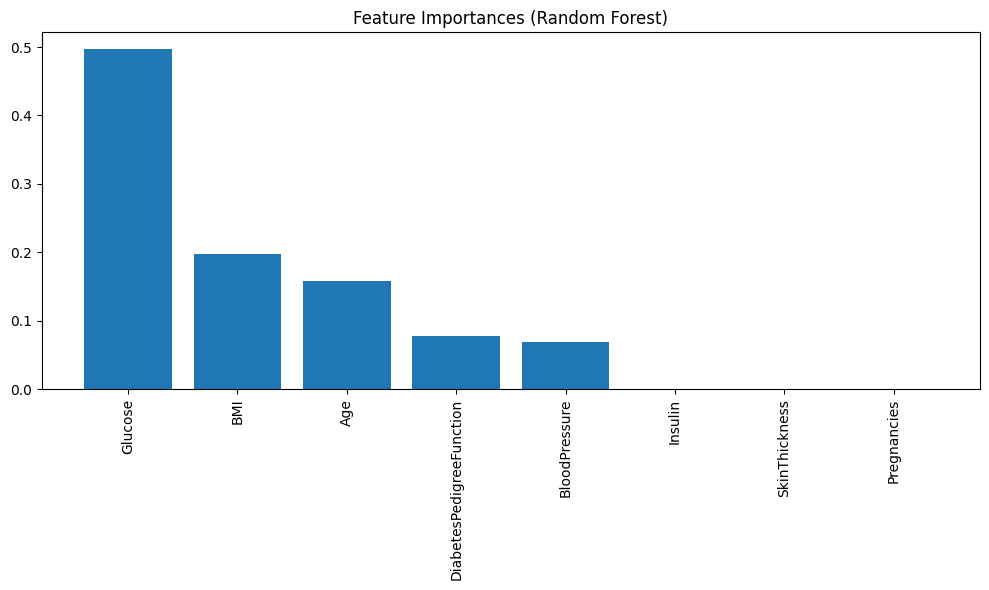

In [69]:
# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

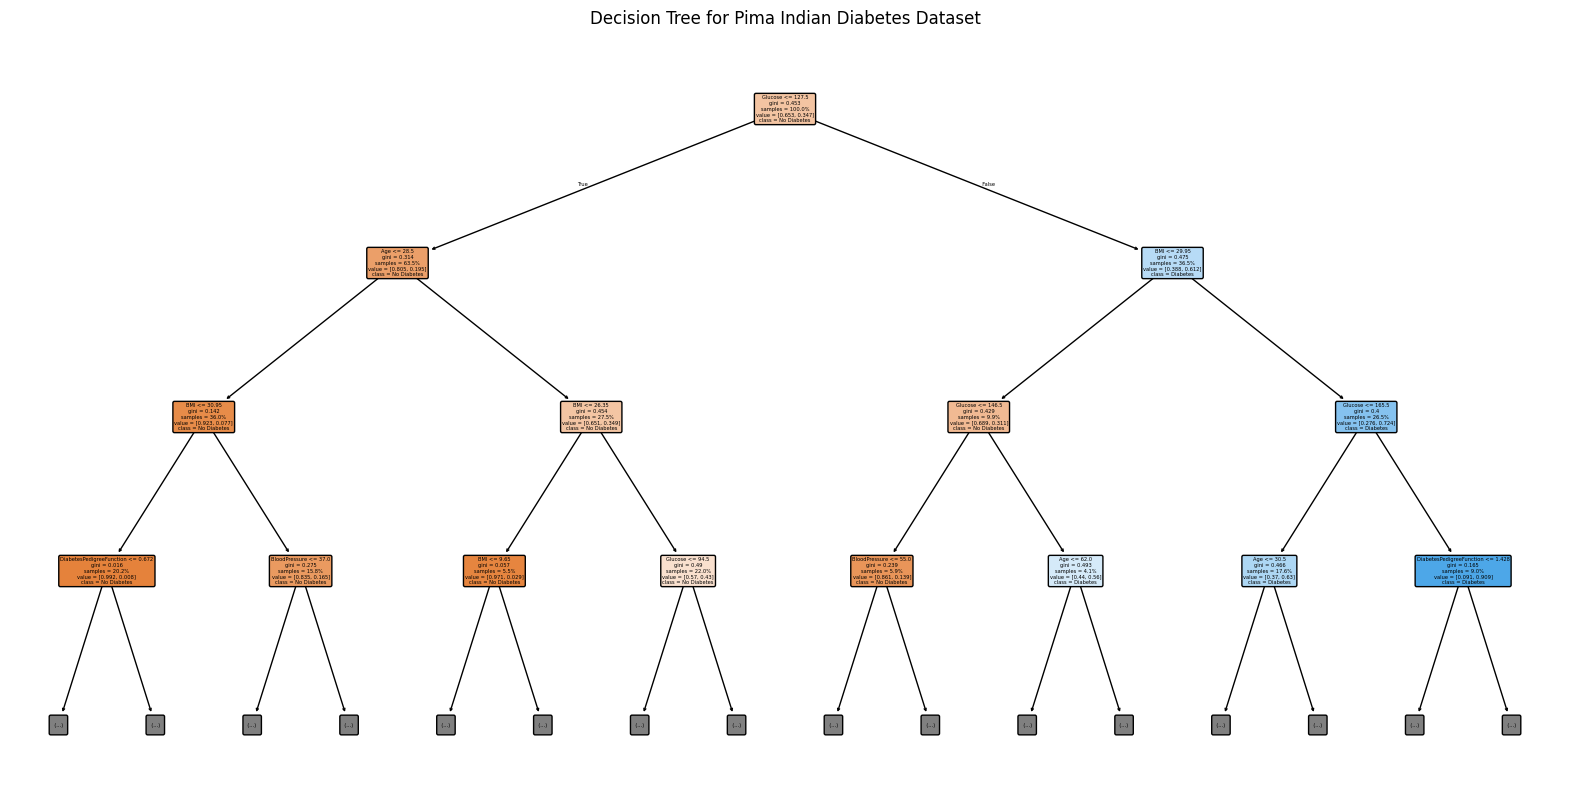

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
tree.plot_tree(model,
               feature_names=X_train.columns,
               class_names=["No Diabetes", "Diabetes"],
               filled=True,
               rounded=True,
               proportion=True,
               max_depth=3)  # Limit tree depth for clarity

plt.title("Decision Tree for Pima Indian Diabetes Dataset")
plt.show()


#### 6. Making Predictions

We will make predictions on the test set using the trained model.


In [71]:
# Making predictions
y_pred = model.predict(X_test)

#### 7. Evaluating the Model

We will evaluate the model using accuracy and a classification report.


In [72]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



#### 8. Saving the Trained Model

Finally, we will save the trained model for future use.


In [73]:
# Saving the trained model
joblib.dump(model, '../models/decision-tree-model.pkl')
print("Model saved successfully as 'decision-tree-model.pkl'!")

Model saved successfully as 'decision-tree-model.pkl'!
